 # Predicting whether a person will default on their Premium

## Problem

Client is an Insurance company and they need help in building a model to predict whether the policyholder (customer) will pay next premium on time or not.

In [553]:
# Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [554]:
#Read data into dataframes
df = pd.read_csv('train.csv')

# Exploratory Data Analysis (EDA)

Let's first have a look at the dataset and understand the size, attribute names etc.

In [555]:
# take a look at the top 5 rows of the train set, notice the column "target "
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.42900,12058,355060,0.00000,0.00000,0.00000,99.02000,13,C,Urban,1
1,41492,0.01000,21546,315150,0.00000,0.00000,0.00000,99.89000,21,A,Urban,1
2,31300,0.91700,17531,84140,2.00000,3.00000,1.00000,98.69000,7,C,Rural,0
3,19415,0.04900,15341,250510,0.00000,0.00000,0.00000,99.57000,9,A,Urban,1
4,99379,0.05200,31400,198680,0.00000,0.00000,0.00000,99.87000,12,B,Urban,1


In [556]:
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.00000,79853.00000,79853.00000,79853.00000,79756.00000,79756.00000,79756.00000,76879.00000,79853.00000,79853.00000
mean,57167.16637,0.31429,18846.69691,208847.17118,0.24867,0.07819,0.06001,99.06729,10.86389,0.93741
std,32928.97016,0.33491,5208.71914,496582.59726,0.69147,0.43651,0.31202,0.73980,5.17069,0.24223
min,2.00000,0.00000,7670.00000,24030.00000,0.00000,0.00000,0.00000,91.90000,2.00000,0.00000
25%,28640.00000,0.03400,14974.00000,108010.00000,0.00000,0.00000,0.00000,98.81000,7.00000,1.00000
50%,57262.00000,0.16700,18625.00000,166560.00000,0.00000,0.00000,0.00000,99.21000,10.00000,1.00000
75%,85632.00000,0.53800,22636.00000,252090.00000,0.00000,0.00000,0.00000,99.54000,14.00000,1.00000
max,114076.00000,1.00000,37602.00000,90262600.00000,13.00000,17.00000,11.00000,99.89000,60.00000,1.00000


In [557]:
# show the shape of the dataset i.e. no of rows, no of columns
df.shape

(79853, 12)

In [558]:
# take a look at the features (i.e. independent variables) in the dataset
df.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [559]:
# show the data types for each column of the train set
df.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [560]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

##### Note: There are 12 columns of features and 79853 rows of records in the train set

In [561]:
#Droping the id Value because it is unique 
df.drop('id',axis=1,inplace=True)

In [562]:
df.rename(columns={'perc_premium_paid_by_cash_credit':'perc_premium'},inplace=True)

<AxesSubplot:>

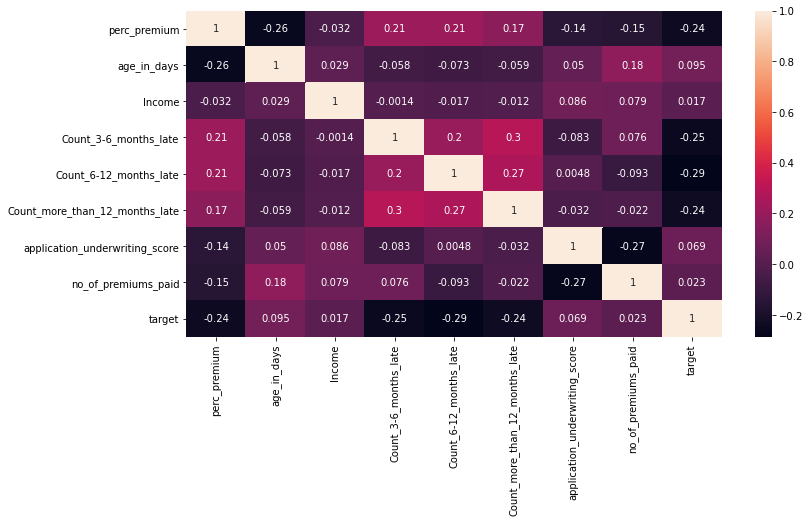

In [563]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

# Univariate analysis

We will first look at the target variable. As it is a Binary variable, let us look at its frequency table, percentage distribution and bar plot.

In [564]:
# frequency table of a variable will give us the count of each category in that variable
df['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

In [565]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
df['target'].value_counts(normalize=True)

1   0.93741
0   0.06259
Name: target, dtype: float64

<AxesSubplot:>

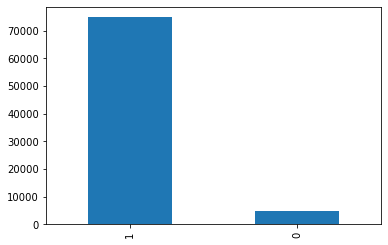

In [566]:
# bar plot to visualize the frequency
df['target'].value_counts().plot.bar()

Note: The premium paid by 74855 (around 93%) people out of 79853 was paid. There is imbalanced classes issue in this dataset, thus accuracy as an evaluation metric should not be appropriate. So, there are imbalanced or skewed classes, then we need to use precision and recall as evaluation metrics.

### Independent Variable (Categorical)

There are 2 features that are Categorical (sourcing_channel, residence_area_type)

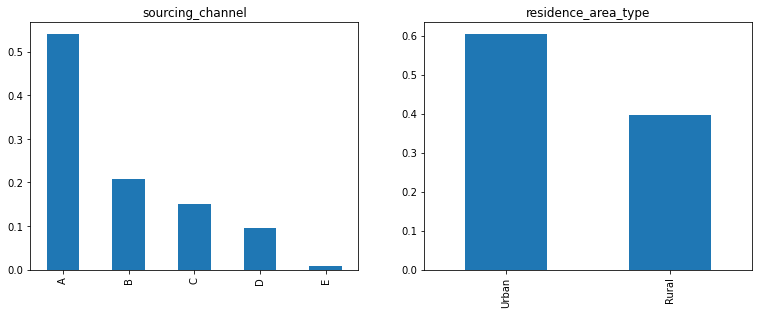

In [567]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
df['sourcing_channel'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'sourcing_channel')

plt.subplot(232)
df['residence_area_type'].value_counts(normalize=True).plot.bar(title= 'residence_area_type')
plt.show()

## Independent Variable (Numerical)

There are 8 features that are Numerical: These features have numerical values ( age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score, no_of_premiums_paid)

Firstly, let’s look at the perc_premium distribution:

<AxesSubplot:xlabel='perc_premium', ylabel='Density'>

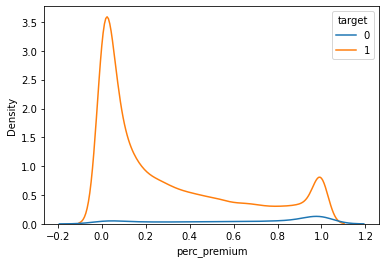

In [568]:
sns.kdeplot(data=df, x="perc_premium",hue='target')

<AxesSubplot:xlabel='perc_premium', ylabel='Count'>

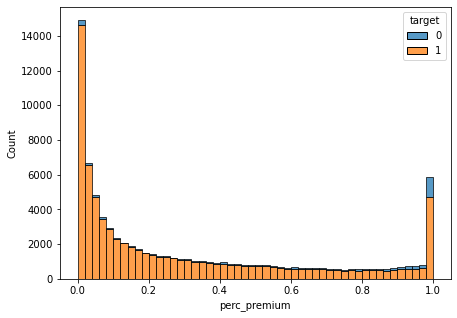

In [569]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="perc_premium", hue="target",multiple='stack',bins=50)

<AxesSubplot:xlabel='target', ylabel='perc_premium'>

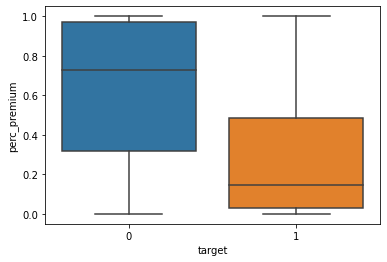

In [570]:
sns.boxplot(x = 'target', y = 'perc_premium', data = df)

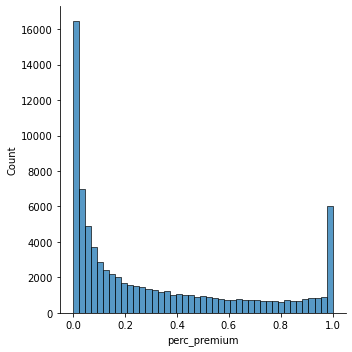

In [571]:
sns.displot(df['perc_premium'])

<AxesSubplot:xlabel='no_of_premiums_paid', ylabel='Count'>

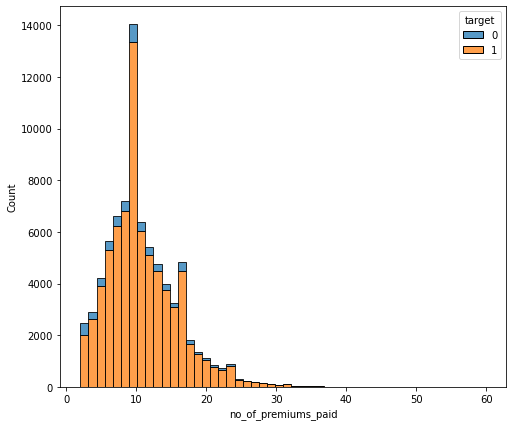

In [572]:
plt.figure(figsize=(8,7))
sns.histplot(data=df, x="no_of_premiums_paid", hue="target",multiple='stack',bins=50)

C:\Users\ASUS\anaconda3\envs\loan\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_of_premiums_paid', ylabel='Density'>

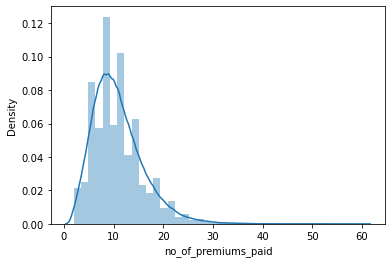

In [573]:
sns.distplot(df.no_of_premiums_paid,bins=40)

<AxesSubplot:ylabel='Income'>

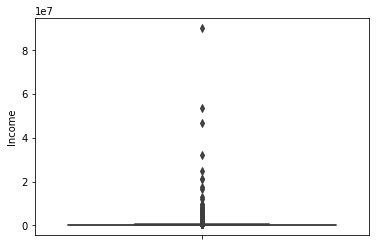

In [574]:
sns.boxplot(y=df.Income)

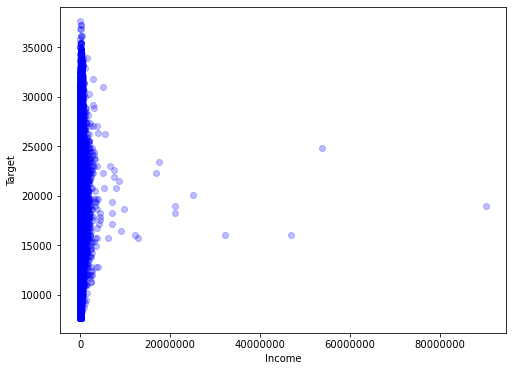

In [578]:
plt.figure(figsize=(8, 6))

plt.scatter(df['Income'], df['age_in_days'], color='blue', alpha=0.25)
plt.xlabel('Income')
plt.ylabel('Target')

# prevents scientific notation on axis
plt.ticklabel_format(useOffset=False, style='plain')

plt.show()

<AxesSubplot:>

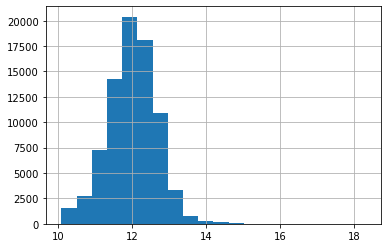

In [576]:
df['Income_log'] = np.log(df['Income']) #log function to reduce the extreme effect in income (which we saw in the previous barplot)
df['Income_log'].hist(bins=20)

(array([2.1852e+04, 3.7769e+04, 1.5232e+04, 3.8790e+03, 7.8900e+02,
        2.4700e+02, 4.6000e+01, 1.8000e+01, 1.3000e+01, 8.0000e+00]),
 array([ 2. ,  7.8, 13.6, 19.4, 25.2, 31. , 36.8, 42.6, 48.4, 54.2, 60. ]),
 <BarContainer object of 10 artists>)

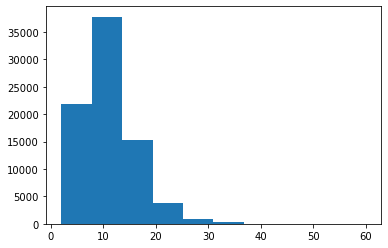

In [477]:
plt.hist(x='no_of_premiums_paid',data=df)

<AxesSubplot:ylabel='no_of_premiums_paid'>

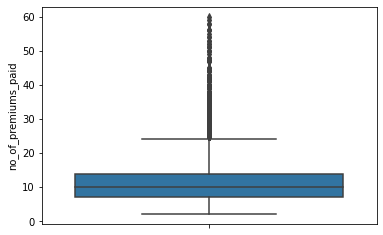

In [478]:
sns.boxplot(y=df.no_of_premiums_paid)

# Understanding The Age column 

(array([ 4361.,  9953., 13973., 16612., 14881., 11892.,  5266.,  2265.,
          619.,    31.]),
 array([ 7670. , 10663.2, 13656.4, 16649.6, 19642.8, 22636. , 25629.2,
        28622.4, 31615.6, 34608.8, 37602. ]),
 <BarContainer object of 10 artists>)

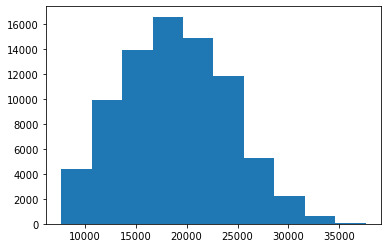

In [479]:
plt.hist(x='age_in_days',data=df)

<AxesSubplot:ylabel='age_in_days'>

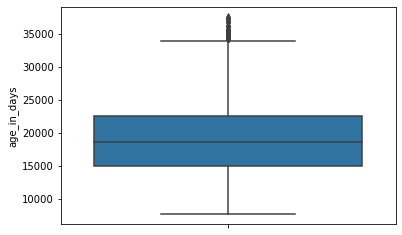

In [480]:
sns.boxplot(y=df.age_in_days,)

There are some outlier in age Column

# Data Pre-processing

Data pre-processing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data pre-processing is a method of resolving such issues.

### Missing value and outlier treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

# Outlier Treatment

check For outlier in Income Column

In [481]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [482]:
df['Income'].describe(percentiles=[.99,.95,.7])

count      79853.00000
mean      208847.17118
std       496582.59726
min        24030.00000
50%       166560.00000
70%       231150.00000
95%       450050.00000
99%       771078.00000
max     90262600.00000
Name: Income, dtype: float64

In [483]:
upper_bound = 0.99
lower_bound = 0.1
res = df['Income'].quantile([lower_bound, upper_bound])
print(res)

0.10000    71200.00000
0.99000   771078.00000
Name: Income, dtype: float64


In [484]:
true_index = (df['Income'] < res.loc[upper_bound])
true_index

0        True
1        True
2        True
3        True
4        True
         ... 
79848    True
79849    True
79850    True
79851    True
79852    True
Name: Income, Length: 79853, dtype: bool

In [485]:
false_index = ~true_index

In [486]:
df.loc[false_index, 'Income'] = 450050.00000

### Let's make groups for the new income range

In [487]:
df['Income'] = pd.cut(df['Income'], bins = 10,labels=range(10))
# df['Income'] = df['Income'].astype(int)
df[['Income', 'target']].groupby('Income', as_index = False).count()


,Income,target
0,0,16564
1,1,24924
2,2,17500
3,3,10436
4,4,4854
5,5,2985
6,6,1328
7,7,667
8,8,348
9,9,247


#### Let's also make groups for Age

In [488]:
df['age_in_days'] = pd.cut(df['age_in_days'],bins = 10,labels=range(10))
# df['age_in_days'] = df['age_in_days'].astype(int)
df[['age_in_days', 'target']].groupby('age_in_days', as_index = False).count()


,age_in_days,target
0,0,4361
1,1,9953
2,2,13973
3,3,16612
4,4,15068
5,5,11705
6,6,5266
7,7,2265
8,8,619
9,9,31


### Missing value imputation

Let’s list out feature-wise count of missing values.

In [489]:
# check for missing values
df.isnull().sum()

perc_premium                         0
age_in_days                          0
Income                               0
Count_3-6_months_late               97
Count_6-12_months_late              97
Count_more_than_12_months_late      97
application_underwriting_score    2974
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
target                               0
Income_log                           0
dtype: int64

There are missing values in Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late, application_underwriting_score features. We will treat the missing values in all the features one by one.

We can set the missing values of underwriting score on the basis of the Random Sample

In [490]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [491]:
median=df.application_underwriting_score.median()

In [492]:
impute_nan(df,"application_underwriting_score",median)

In [493]:
df.drop(['application_underwriting_score', 'application_underwriting_score_median','Income_log'], axis = 1, inplace = True)

Add a new variable 'late premium' for late premiums

In [494]:
for data in [df]:
    data.loc[(data['Count_3-6_months_late'].isnull()),  'late_premium'] = np.NaN
    data.loc[(data['Count_3-6_months_late'].notnull()), 'late_premium'] = data['Count_3-6_months_late'] + data['Count_6-12_months_late'] + data['Count_more_than_12_months_late']
        

If it's more than 7 then the loan is never sanctioned. So, let's set those values first.

In [495]:
df.loc[(df['target'] == 0) & (df['late_premium'].isnull()),'late_premium'] = 7
df.loc[(df['target'] == 1) & (df['late_premium'].isnull()),'late_premium'] = 2

In [496]:
df.drop(['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1, inplace = True)

In [497]:
# check whether all the missing values are filled in the Train dataset
df.isnull().sum()

perc_premium                             0
age_in_days                              0
Income                                   0
no_of_premiums_paid                      0
sourcing_channel                         0
residence_area_type                      0
target                                   0
application_underwriting_score_random    0
late_premium                             0
dtype: int64

In [498]:
df.rename(columns={'application_underwriting_score_random':'application_underwriting_score'},inplace=True)

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   perc_premium                    79853 non-null  float64 
 1   age_in_days                     79853 non-null  category
 2   Income                          79853 non-null  category
 3   no_of_premiums_paid             79853 non-null  int64   
 4   sourcing_channel                79853 non-null  object  
 5   residence_area_type             79853 non-null  object  
 6   target                          79853 non-null  int64   
 7   application_underwriting_score  79853 non-null  float64 
 8   late_premium                    79853 non-null  float64 
dtypes: category(2), float64(3), int64(2), object(2)
memory usage: 4.4+ MB


## Conversion to numerical data

In [500]:
# Converting Area Type and sourcing channel to Ordinal Variables
df['residence_area_type'] = df['residence_area_type'].map( {'Urban' : 1, 'Rural' : 0} )
df['sourcing_channel'] = df['sourcing_channel'].map( {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4} )

In [501]:
df.columns

Index(['perc_premium', 'age_in_days', 'Income', 'no_of_premiums_paid',
       'sourcing_channel', 'residence_area_type', 'target',
       'application_underwriting_score', 'late_premium'],
      dtype='object')

# Model Building : Part I

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [502]:
# drop "target" and assign it to target variable
x=df.drop(['target'],axis=1)
y= df['target']

In [503]:
# adding dummies to the dataset
x=pd.get_dummies(x,drop_first=True)

In [504]:
x.shape

(79853, 24)

In [505]:
x.head()

,perc_premium,no_of_premiums_paid,sourcing_channel,residence_area_type,application_underwriting_score,late_premium,age_in_days_1,age_in_days_2,age_in_days_3,age_in_days_4,...,age_in_days_9,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,Income_9
0,0.42900,13,2,1,99.02000,0.00000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.01000,21,0,1,99.89000,0.00000,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.91700,7,2,0,98.69000,6.00000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.04900,9,0,1,99.57000,0.00000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.05200,12,1,1,99.87000,0.00000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Data is imbalanced

As we early see in the EDA that Dataset is Imbalanced

### Balancing The DataSet

In [506]:
from imblearn.over_sampling import SMOTE
print('Number of positive and negative reviews:\n',y.value_counts())
sm = SMOTE(random_state=2)#,ratio=1.0)
X_train_res , y_train_res = sm.fit_resample(x,y)
print('Shape after oversampling\n',X_train_res.shape) 
print('Equal 1s and 0s \n', np.bincount(y_train_res))

Number of positive and negative reviews:
 1    74855
0     4998
Name: target, dtype: int64
Shape after oversampling
 (149710, 24)
Equal 1s and 0s 
 [74855 74855]


# Spliting the data  Train and test

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [507]:
# import library
from sklearn.model_selection import train_test_split

In [508]:
# split the data into train and cross validation set
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.3, random_state=0)

In [509]:
# take a look at the dimension of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((104797, 24), (44913, 24), (104797,), (44913,))

# Logistic Regression

The dataset has been divided into training and validation part. Let us import LogisticRegression, confusion matrix and classification Report from sklearn and fit the logistic regression model.

In [510]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [511]:
# fit the model
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\envs\loan\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [512]:
# make prediction
y_pred = lr.predict(X_test)

In [513]:
# calculate accuracy score
accuracy_score(y_test,y_pred)

0.7917529445817469

So our predictions are over 79% accurate, i.e. we have identified 79% of the loan status correctly.

Let’s evaluate our model with the confusion matrix.

[[17450  5181]
 [ 4172 18110]]


Text(33.0, 0.5, 'True')

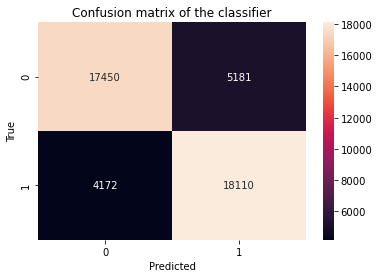

In [514]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

Let's build a text report showing the main classification metrics.

In [515]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     22631
           1       0.78      0.81      0.79     22282

    accuracy                           0.79     44913
   macro avg       0.79      0.79      0.79     44913
weighted avg       0.79      0.79      0.79     44913



The performance of our model seems encouraging, with accuracy of 79%, precision of 79% and recall of 79%.

# Import the Test Dataset 

Importing the test dataset and repeating the all steps of data pe processing 

In [516]:
df1 = pd.read_csv('test.csv')

In [517]:
df1.shape

(34224, 11)

In [518]:
# take a look at the top 5 rows of the test set, notice the absense of "target" that we will predict
df1.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.00100,27384,51150,0.00000,0.00000,0.00000,99.89000,7,A,Rural
1,81136,0.12400,23735,285140,0.00000,0.00000,0.00000,98.93000,19,A,Urban
2,70762,1.00000,17170,186030,0.00000,0.00000,0.00000,NaN,2,B,Urban
3,53935,0.19800,16068,123540,0.00000,0.00000,0.00000,99.00000,11,B,Rural
4,15476,0.04100,10591,200020,1.00000,0.00000,0.00000,99.17000,14,A,Rural


In [519]:
test_id=df1['id'].copy()

In [520]:
df1.drop('id',axis=1,inplace=True)

In [521]:
df1.rename(columns={'perc_premium_paid_by_cash_credit':'perc_premium'},inplace=True)

In [522]:
df1.Income.describe()

count      34224.00000
mean      202820.12710
std       270253.60800
min        24030.00000
25%       106397.50000
50%       165070.00000
75%       250020.00000
max     21914550.00000
Name: Income, dtype: float64

In [523]:
upper_bound = 0.99
lower_bound = 0.1
res = df1['Income'].quantile([lower_bound, upper_bound])
print(res)

0.10000    71573.00000
0.99000   750080.00000
Name: Income, dtype: float64


In [524]:
true_index = (df1['Income'] < res.loc[upper_bound])
true_index

0        True
1        True
2        True
3        True
4        True
         ... 
34219    True
34220    True
34221    True
34222    True
34223    True
Name: Income, Length: 34224, dtype: bool

In [525]:
false_index = ~true_index

In [526]:
df1.loc[false_index, 'Income'] = 450050.00000

In [527]:
df1['age_in_days'] = pd.cut(df1['age_in_days'],bins= 10,labels=range(10))
# df1['age_in_days']=df1['age_in_days'].astype(int)

In [528]:
df1.age_in_days.value_counts()

4    6425
3    6193
2    5878
5    5295
1    4081
6    2554
7    1646
0    1519
8     558
9      75
Name: age_in_days, dtype: int64

In [529]:
df1['Income'] = pd.cut(df1['Income'], bins=10,labels=range(10))
# df1['Income']=df1['Income'].astype(int)

In [530]:
df1.Income.value_counts()

1    10546
2     7529
0     7095
3     4211
4     2328
5     1471
6      504
7      297
8      148
9       95
Name: Income, dtype: int64

In [531]:
df1.isnull().sum()

perc_premium                         0
age_in_days                          0
Income                               0
Count_3-6_months_late               31
Count_6-12_months_late              31
Count_more_than_12_months_late      31
application_underwriting_score    1323
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
dtype: int64

In [532]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [533]:
median=df1.application_underwriting_score.median()

In [534]:
impute_nan(df1,"application_underwriting_score",median)

In [535]:
for data in [df1]:
    data.loc[(data['Count_3-6_months_late'].isnull()),  'late_premium'] = np.NaN
    data.loc[(data['Count_3-6_months_late'].notnull()), 'late_premium'] = data['Count_3-6_months_late'] + data['Count_6-12_months_late'] + data['Count_more_than_12_months_late']
        

In [536]:
df1.loc[(df1['late_premium'].isnull() )& (df1['application_underwriting_score_random']>=98.83306),'late_premium']=2
df1.loc[(df1['late_premium'].isnull() )& (df1['application_underwriting_score_random']<=98.83306),'late_premium']=7

        

In [537]:
df1.drop(['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1, inplace = True)

In [538]:
df1.drop(['application_underwriting_score', 'application_underwriting_score_median'], axis = 1, inplace = True)

In [539]:
df1.rename(columns={'application_underwriting_score_random':'application_underwriting_score'},inplace=True)

In [540]:
df1.isnull().sum()

perc_premium                      0
age_in_days                       0
Income                            0
no_of_premiums_paid               0
sourcing_channel                  0
residence_area_type               0
application_underwriting_score    0
late_premium                      0
dtype: int64

In [541]:
df1['residence_area_type'] = df1['residence_area_type'].map( {'Urban' : 1, 'Rural' : 0} )
df1['sourcing_channel'] = df1['sourcing_channel'].map( {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4} )

In [542]:
df1=pd.get_dummies(df1,drop_first=True)

In [543]:
x.head()

,perc_premium,no_of_premiums_paid,sourcing_channel,residence_area_type,application_underwriting_score,late_premium,age_in_days_1,age_in_days_2,age_in_days_3,age_in_days_4,...,age_in_days_9,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,Income_9
0,0.42900,13,2,1,99.02000,0.00000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.01000,21,0,1,99.89000,0.00000,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.91700,7,2,0,98.69000,6.00000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.04900,9,0,1,99.57000,0.00000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.05200,12,1,1,99.87000,0.00000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [544]:
df1.head()

,perc_premium,no_of_premiums_paid,sourcing_channel,residence_area_type,application_underwriting_score,late_premium,age_in_days_1,age_in_days_2,age_in_days_3,age_in_days_4,...,age_in_days_9,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,Income_9
0,0.00100,7,0,0,99.89000,0.00000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.12400,19,0,1,98.93000,0.00000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.00000,2,1,1,98.91000,0.00000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0.19800,11,1,0,99.00000,0.00000,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.04100,14,0,0,99.17000,1.00000,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [545]:
x_test = df1

In [546]:
from sklearn.metrics import roc_auc_score

In [547]:
# result=lr.predict(x_test)
result=lr.predict_proba(x_test)[:, 1]

In [548]:
dict1 = {'id':test_id ,'target':result}

In [549]:
sample = pd.DataFrame(dict1)

In [550]:
sample.to_csv('Loan1.csv',index=False)